   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 100.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.7/671.7 kB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.3/309.3 kB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 54.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 140.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.2/149.2 kB 40.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice]

2024-08-23 17:35:06.291 
  command:

    streamlit run /home/gitpod/.pyenv/versions/3.12.4/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-08-23 17:35:07.467 Session state does not function when running a script without `streamlit run`


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

/tmp/ipykernel_3136/2554852563.py:61: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


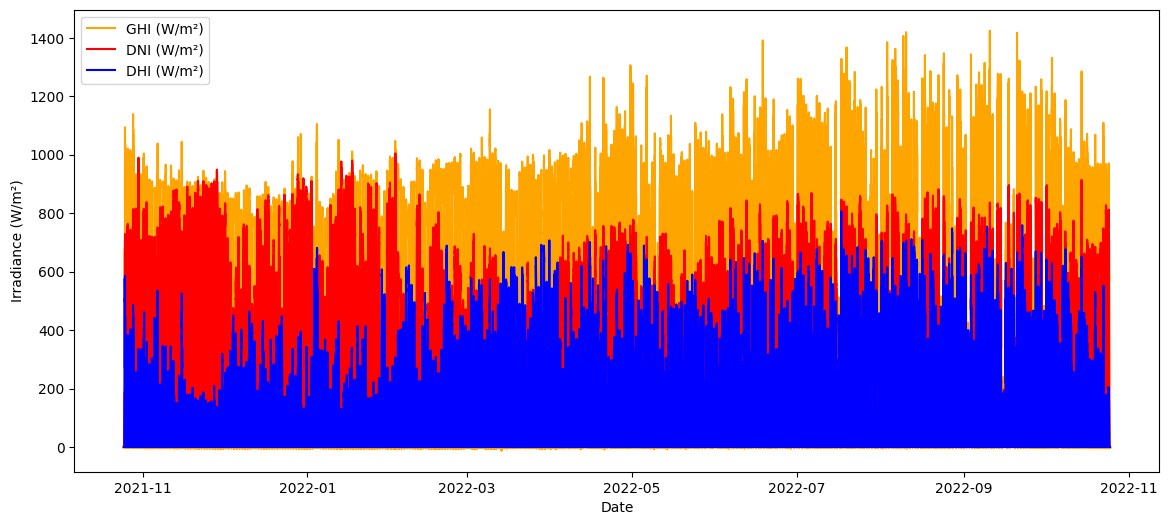

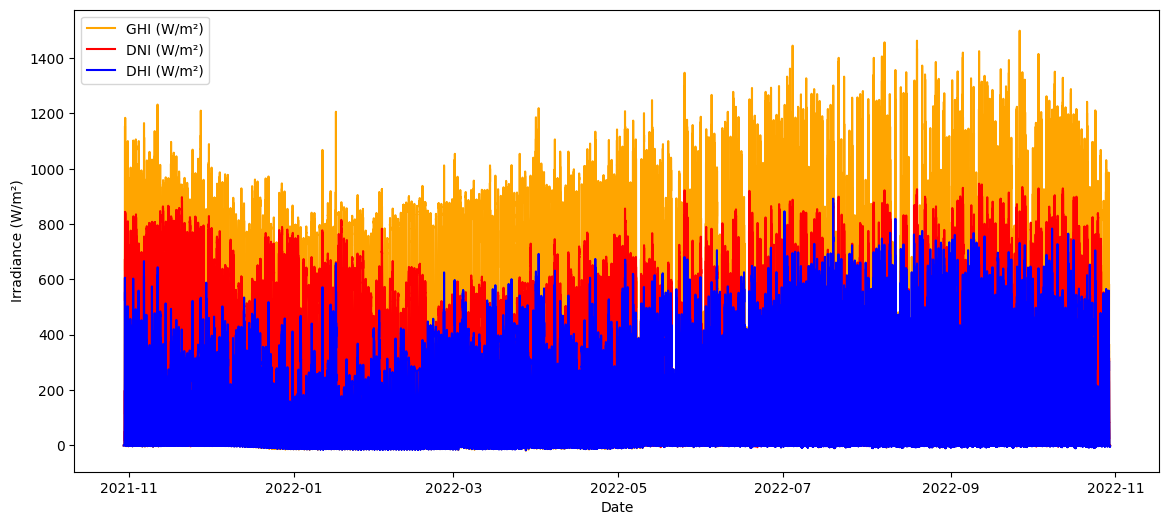

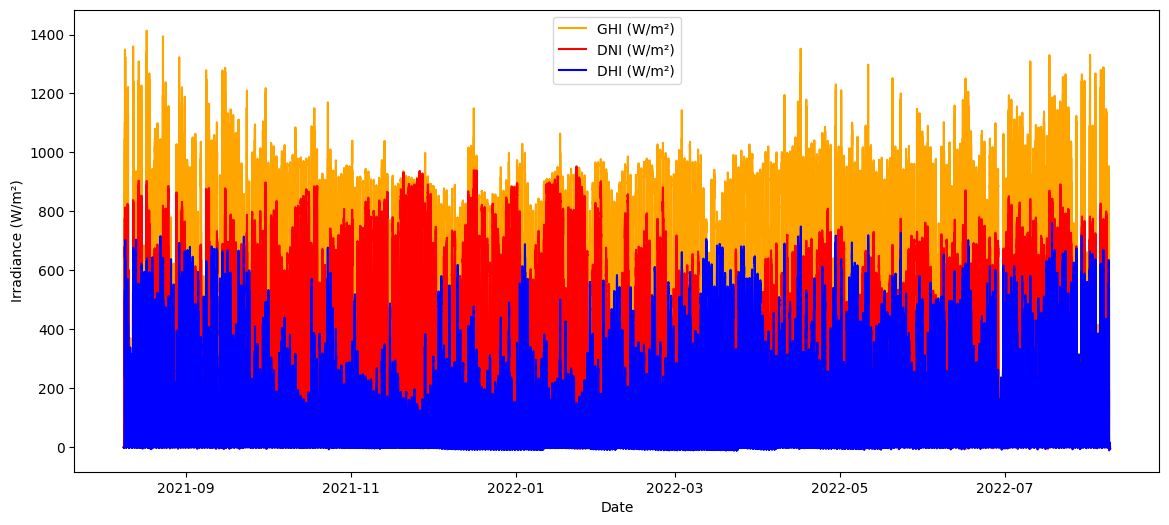

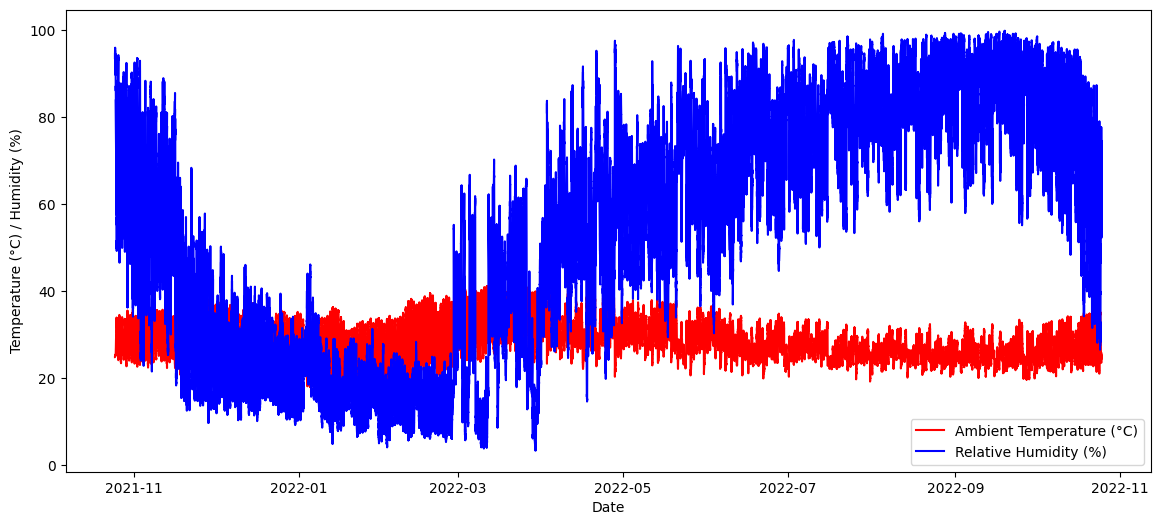

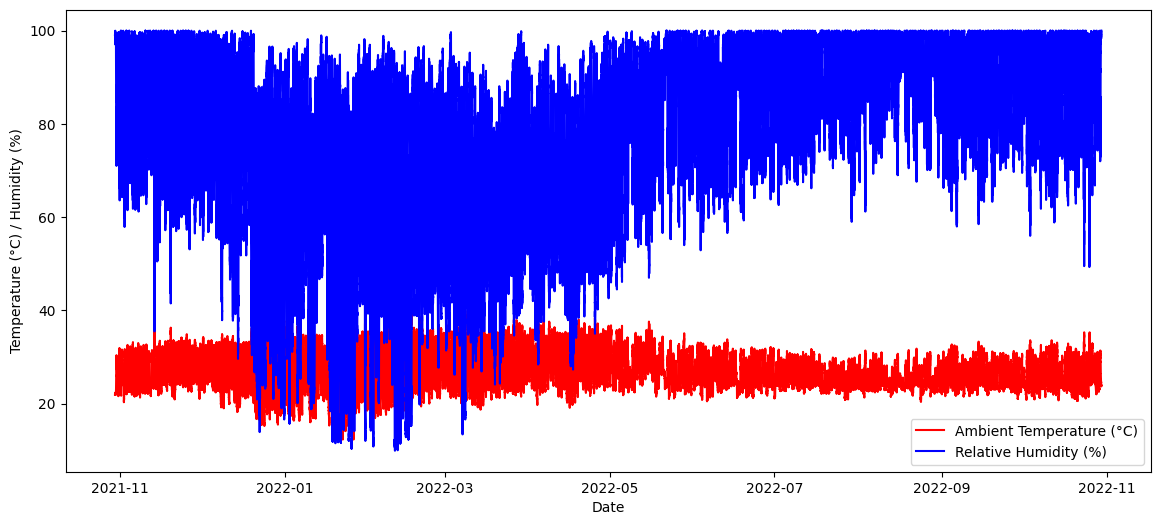

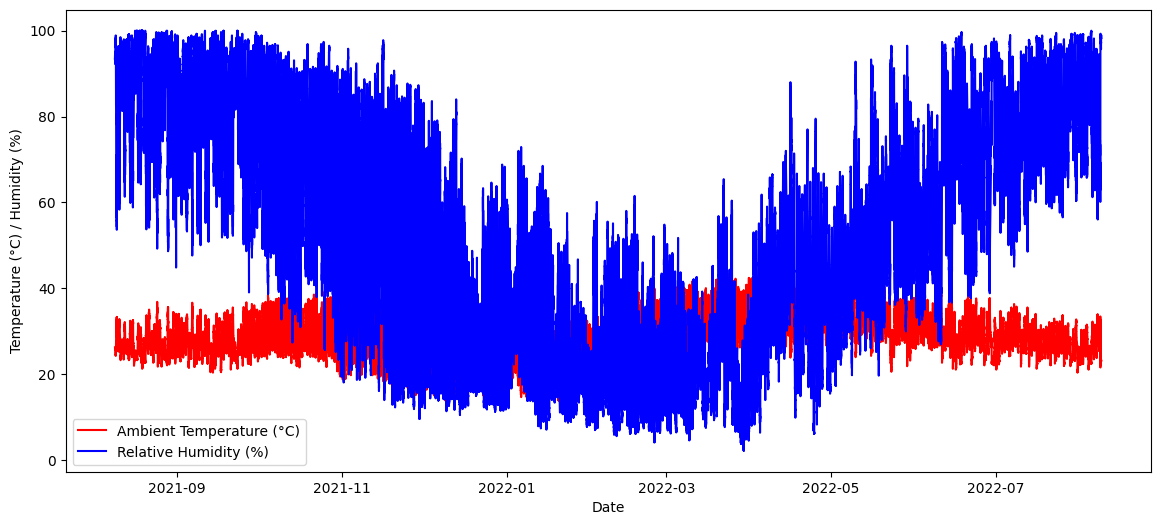

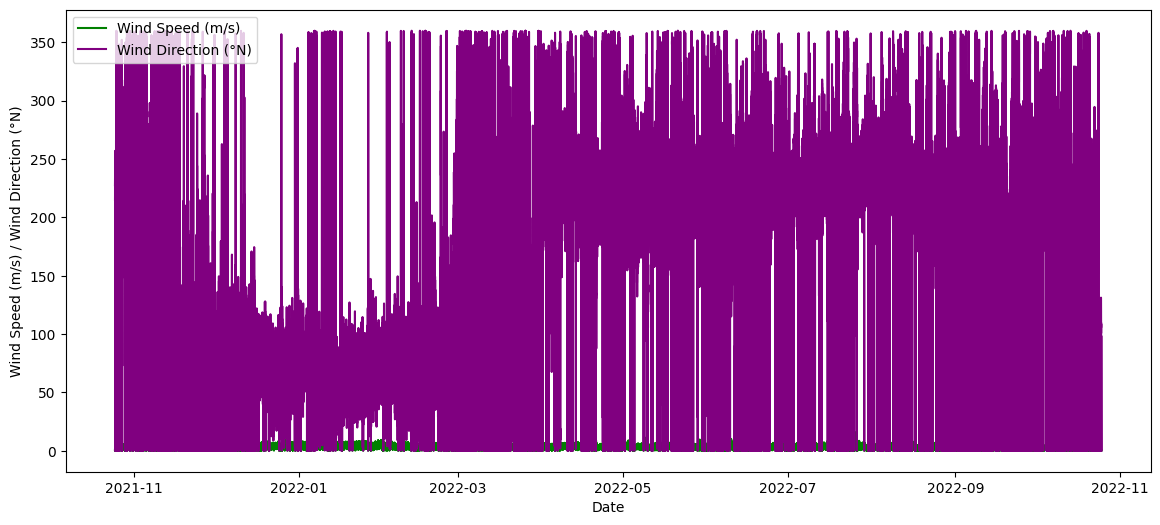

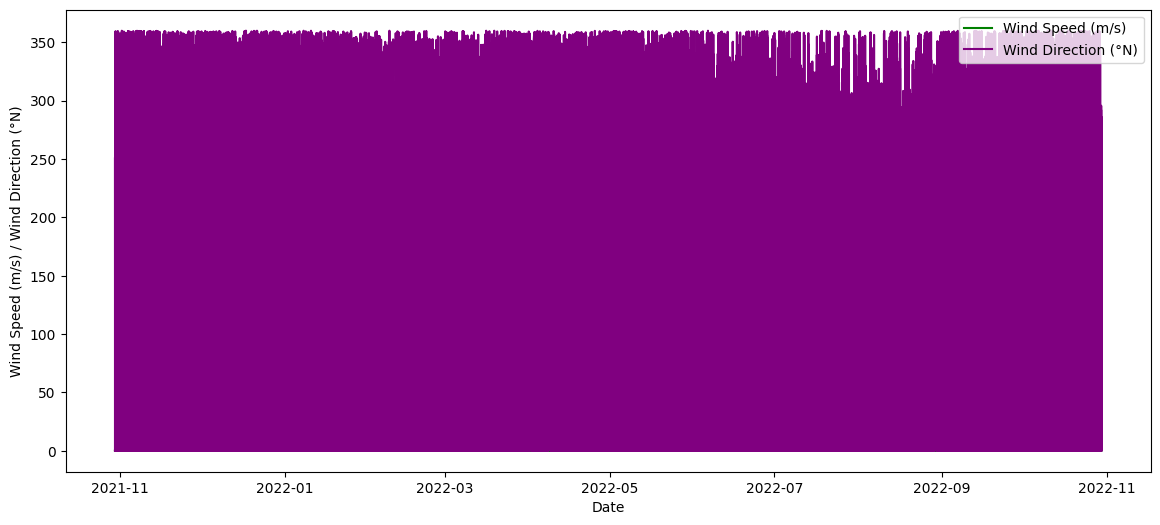

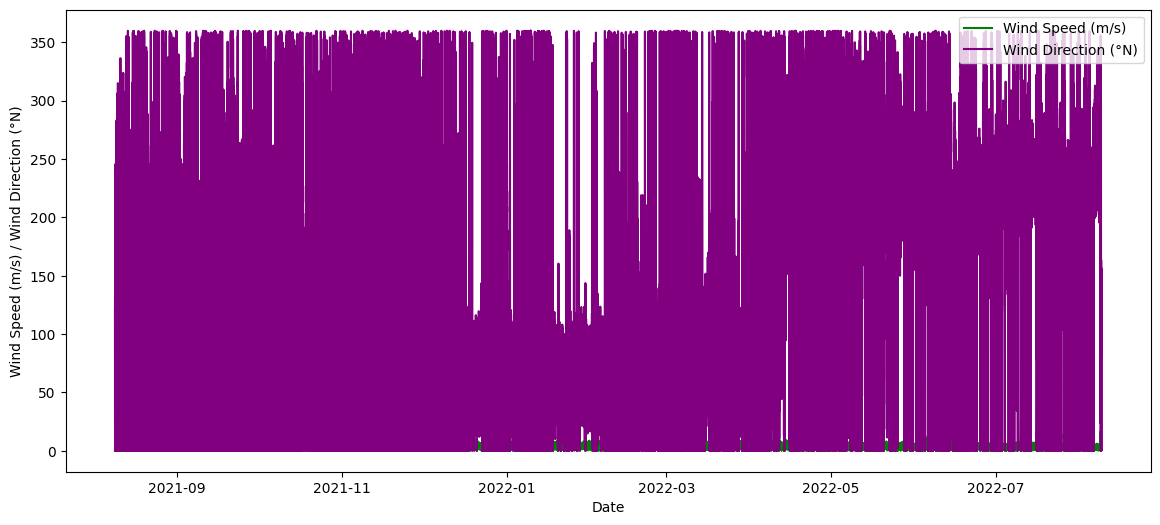

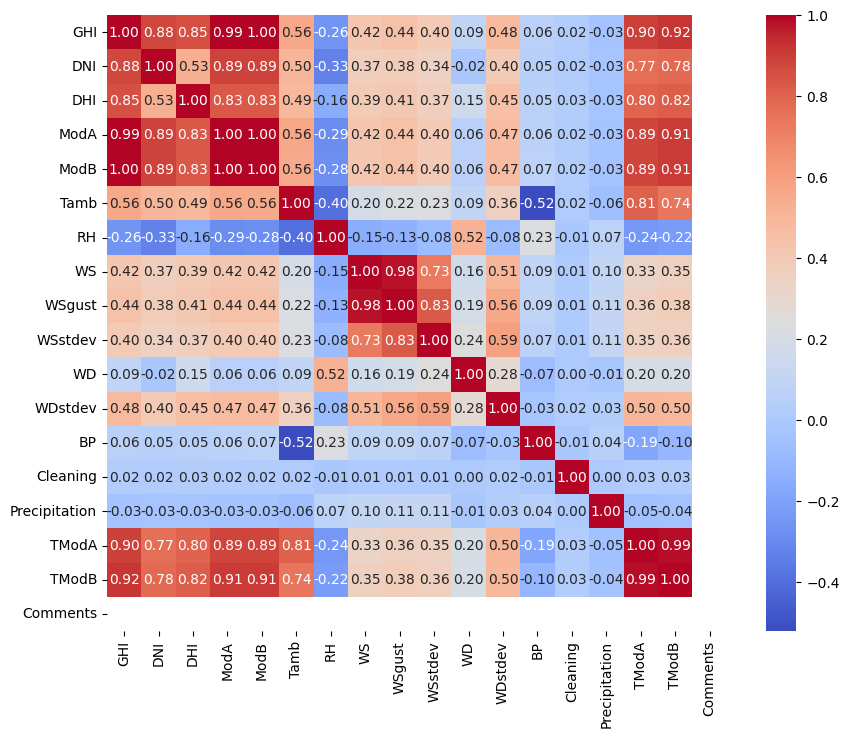

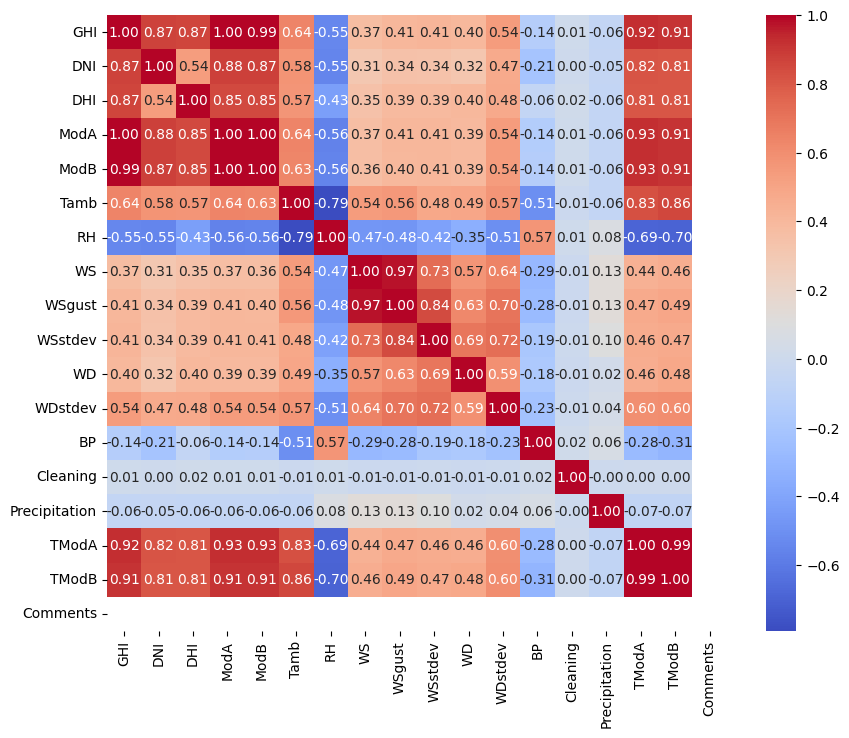

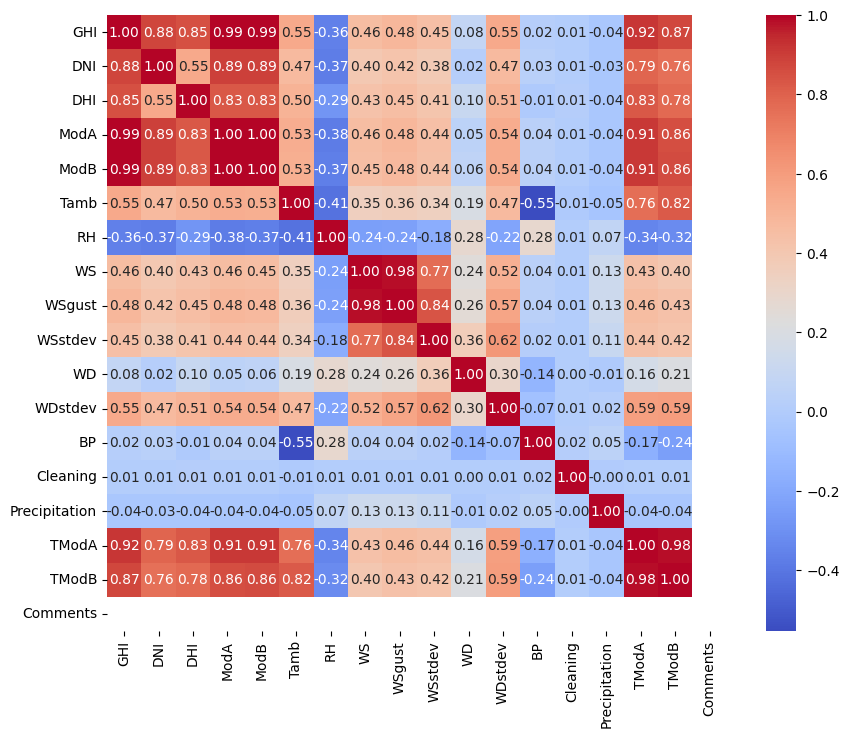

In [5]:
!pip install streamlit
!pip install seaborn
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
#i wrote a function to load the csv file and its first rows
def load_and_preview_data(filename, region_name):
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        st.write(f"{region_name} Data:")
        st.dataframe(df.head())
        return df
    else:
        st.error(f"File {filename} not found.")
        return None

# we load the csv files into dataframes
df_togo = load_and_preview_data('togo-dapaong_qc.csv', 'Togo - Dapaong')
df_sierraleone = load_and_preview_data('sierraleone-bumbuna.csv', 'Sierra Leone - Bumbuna')
df_benin = load_and_preview_data('benin-malanville.csv', 'Benin - Malanville')

# a function to check the structure of each dataframe
def check_info(df, region_name):
    if df is not None:
        st.write(f"\n{region_name} Info:")
        buffer = st.text_area(f'{region_name} Info', value=df.info(buf=None), height=200)

# we check the structure of each DataFrame
check_info(df_togo, 'Togo - Dapaong')
check_info(df_sierraleone, 'Sierra Leone - Bumbuna')
check_info(df_benin, 'Benin - Malanville')

# make a new function to get basic statistic for each DataFrame
def show_statistics(df, region_name):
    if df is not None:
        st.write(f"\n{region_name} Statistics:")
        st.dataframe(df.describe())

# get basic statistic for each DataFrame
show_statistics(df_togo, 'Togo - Dapaong')
show_statistics(df_sierraleone, 'Sierra Leone - Bumbuna')
show_statistics(df_benin, 'Benin - Malanville')

# a function to check whethere there is missing values in each DataFrame
def check_missing_values(df, region_name):
    if df is not None:
        st.write(f"\nMissing values in {region_name}:")
        st.write(df.isnull().sum())

# to check for missing values in each DataFrame
check_missing_values(df_togo, 'Togo - Dapaong')
check_missing_values(df_sierraleone, 'Sierra Leone - Bumbuna')
check_missing_values(df_benin, 'Benin - Malanville')

# example: fill missing values with forward fill
def fill_missing_values(df):
    if df is not None:
        df.fillna(method='ffill', inplace=True)

fill_missing_values(df_togo)
fill_missing_values(df_sierraleone)
fill_missing_values(df_benin)

# convert timestamp to datetime format and set as index
def preprocess_data(df):
    if df is not None:
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        df.set_index('Timestamp', inplace=True)

preprocess_data(df_togo)
preprocess_data(df_sierraleone)
preprocess_data(df_benin)

# function to plot GHI, DNI, and DHI graph over time
def plot_irradiance(df, region_name):
    if df is not None:
        st.write(f'Solar Irradiance Over Time in {region_name}')
        plt.figure(figsize=(14, 6))
        plt.plot(df.index, df['GHI'], label='GHI (W/m²)', color='orange')
        plt.plot(df.index, df['DNI'], label='DNI (W/m²)', color='red')
        plt.plot(df.index, df['DHI'], label='DHI (W/m²)', color='blue')
        plt.xlabel('Date')
        plt.ylabel('Irradiance (W/m²)')
        plt.legend()
        st.pyplot(plt)

# a plot for each region
plot_irradiance(df_togo, 'Togo - Dapaong')
plot_irradiance(df_sierraleone, 'Sierra Leone - Bumbuna')
plot_irradiance(df_benin, 'Benin - Malanville')

# a function to plot temperature and humidity over time
def plot_temp_humidity(df, region_name):
    if df is not None:
        st.write(f'Temperature and Humidity Over Time in {region_name}')
        plt.figure(figsize=(14, 6))
        plt.plot(df.index, df['Tamb'], label='Ambient Temperature (°C)', color='red')
        plt.plot(df.index, df['RH'], label='Relative Humidity (%)', color='blue')
        plt.xlabel('Date')
        plt.ylabel('Temperature (°C) / Humidity (%)')
        plt.legend()
        st.pyplot(plt)

# a plot for each region
plot_temp_humidity(df_togo, 'Togo - Dapaong')
plot_temp_humidity(df_sierraleone, 'Sierra Leone - Bumbuna')
plot_temp_humidity(df_benin, 'Benin - Malanville')

# a function to plot Wind Speed and Direction over time
def plot_wind_conditions(df, region_name):
    if df is not None:
        st.write(f'Wind Conditions Over Time in {region_name}')
        plt.figure(figsize=(14, 6))
        plt.plot(df.index, df['WS'], label='Wind Speed (m/s)', color='green')
        plt.plot(df.index, df['WD'], label='Wind Direction (°N)', color='purple')
        plt.xlabel('Date')
        plt.ylabel('Wind Speed (m/s) / Wind Direction (°N)')
        plt.legend()
        st.pyplot(plt)

#  a plot for each region
plot_wind_conditions(df_togo, 'Togo - Dapaong')
plot_wind_conditions(df_sierraleone, 'Sierra Leone - Bumbuna')
plot_wind_conditions(df_benin, 'Benin - Malanville')

#   a function to plot the correlation matrix
def plot_correlation_matrix(df, region_name):
    if df is not None:
        st.write(f'Correlation Matrix for {region_name}')
        corr_matrix = df.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        st.pyplot(plt)

#  a plot correlation matrix for each region
plot_correlation_matrix(df_togo, 'Togo - Dapaong')
plot_correlation_matrix(df_sierraleone, 'Sierra Leone - Bumbuna')
plot_correlation_matrix(df_benin, 'Benin - Malanville')


In [19]:
# Install the required package
%pip install python-docx

from docx import Document
from docx.shared import Pt
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT, WD_BREAK

# Create a new Document
doc = Document()

# Add Title
doc.add_heading('Strategic Recommendation Report', 0).alignment = WD_PARAGRAPH_ALIGNMENT.CENTER

# Add Executive Summary
doc.add_heading('Executive Summary', level=1)
doc.add_paragraph(
    "MoonLight Energy Solutions aims to enhance operational efficiency and sustainability through targeted solar "
    "investments. Our analysis of environmental data from three regions—Togo (Dapaong), Sierra Leone (Bumbuna), and "
    "Benin (Malanville)—has identified key trends that will guide the company's strategic decisions. This report provides "
    "recommendations for the optimal region(s) for solar installation, taking into account solar irradiance, temperature, "
    "humidity, and wind conditions."
)

# Add Data Overview and Key Findings
doc.add_heading('1. Overview of Analysis', level=1)
doc.add_heading('1.1 Data Overview', level=2)
doc.add_paragraph(
    "The dataset analyzed includes solar radiation measurements (GHI, DNI, DHI), temperature, humidity, wind speed, and "
    "direction, along with additional environmental factors like barometric pressure and precipitation. The primary goal was "
    "to identify the region with the most favorable conditions for solar panel installation."
)

doc.add_heading('1.2 Key Findings', level=2)
doc.add_paragraph(
    "• Togo (Dapaong): Exhibits the highest and most consistent solar irradiance, with GHI peaking consistently. The "
    "temperature is moderate, and humidity levels are within an optimal range.\n"
    "• Sierra Leone (Bumbuna): Shows moderate solar irradiance with higher variability. Temperature and humidity are "
    "slightly higher, which could impact solar panel efficiency.\n"
    "• Benin (Malanville): Displays lower solar irradiance compared to Togo but has relatively stable conditions. Wind "
    "speed and direction are favorable, but temperature extremes might affect performance."
)

# Add Detailed Analysis
doc.add_heading('2. Detailed Analysis', level=1)

doc.add_heading('2.1 Solar Irradiance', level=2)
doc.add_paragraph(
    "Togo (Dapaong) stands out with the highest GHI values, indicating strong potential for solar energy generation. "
    "The consistency in DNI also suggests that this region receives direct sunlight without significant obstruction.\n"
    "Recommendation: Prioritize Togo for solar panel installation due to its superior solar irradiance levels."
)

doc.add_heading('2.2 Temperature and Humidity', level=2)
doc.add_paragraph(
    "Togo (Dapaong) and Benin (Malanville) have moderate temperature levels, which are ideal for solar panel efficiency. "
    "However, Sierra Leone (Bumbuna) shows higher humidity levels, which might affect the durability of solar panels over time.\n"
    "Recommendation: Favor regions with moderate temperatures like Togo and Benin to optimize panel performance and longevity."
)

doc.add_heading('2.3 Wind Conditions', level=2)
doc.add_paragraph(
    "Benin (Malanville) has favorable wind conditions with moderate wind speeds and consistent wind direction, which "
    "can help in cooling solar panels and reducing thermal stress.\n"
    "Recommendation: Consider Benin for installations that might benefit from wind cooling, though additional structural "
    "support may be necessary for regions with higher wind variability."
)

doc.add_heading('2.4 Correlation Analysis', level=2)
doc.add_paragraph(
    "Strong positive correlations between solar irradiance (GHI, DNI) and temperature were observed in all regions. "
    "Wind speed showed a negative correlation with irradiance, indicating that higher wind speeds might reduce the amount "
    "of solar energy received.\n"
    "Recommendation: Focus on regions where the correlation between temperature and irradiance is favorable, with minimal "
    "negative impact from wind conditions."
)

# Add Strategic Recommendations
doc.add_heading('3. Strategic Recommendations', level=1)

doc.add_heading('3.1 Region Selection', level=2)
doc.add_paragraph(
    "Primary Recommendation: Togo (Dapaong) emerges as the most favorable region for solar installations due to its high "
    "and consistent solar irradiance, moderate temperatures, and optimal humidity levels.\n"
    "Secondary Recommendation: Benin (Malanville) is a viable option for installations where wind cooling might be beneficial, "
    "though temperature extremes should be managed."
)

doc.add_heading('3.2 Operational Efficiency', level=2)
doc.add_paragraph(
    "Panel Placement: In Togo, panels should be placed in areas that maximize exposure to direct sunlight, taking into account "
    "the direction and intensity of solar radiation throughout the day.\n"
    "Technology Choice: Use solar panels that are optimized for high-temperature environments to mitigate any potential efficiency loss."
)

doc.add_heading('3.3 Risk Mitigation', level=2)
doc.add_paragraph(
    "Wind Protection: In regions like Benin with variable wind conditions, consider using reinforced structures or tracking systems "
    "that can adjust to changing wind directions.\n"
    "Maintenance Strategy: Implement a regular maintenance schedule in Sierra Leone to manage the effects of higher humidity on solar panel performance."
)

# Add Conclusion
doc.add_heading('4. Conclusion', level=1)
doc.add_paragraph(
    "The analysis clearly identifies Togo (Dapaong) as the prime candidate for solar investments, aligning with MoonLight "
    "Energy Solutions' goal of enhancing operational efficiency and sustainability. By prioritizing this region and considering "
    "the secondary option of Benin, the company can achieve significant gains in solar energy generation while managing risks effectively."
)

# Save the document
doc.save('Strategic_Recommendation_Report.docx')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 2.1 MB/s eta 0:00:00
